### This notebook is for querying station log files for checking locations and checking trends in thresholds and trigger rates

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
import read_logs
import datetime as dt
import numpy as np

### For reading in all logs from a single folder within a time range

Note: Within the parsing functions, the log files are examined for any bad lines (wrong number of entries or extremely bad GPS locations). The file will then be automatically backed up and these bad lines are then removed, if there are less than 26. This is designed to be run on a Linux OS, so they may error on other OS's, but the lines will be printed and can be removed manually, then re-ran. 

In [7]:
useddir = '/Users/Vanna/Desktop/VSE_logs/'
start_time = dt.datetime(2016,3,2)
end_time = dt.datetime(2016,3,2,23,59)

In [8]:
days = np.array([start_time+dt.timedelta(days=i) for i in range((end_time-start_time).days+1)])
days_string = np.array([i.strftime("%y%m%d") for i in days])

logs = pd.DataFrame()
dir = os.listdir(useddir)
for file in dir:
    if np.any(file[2:] == days_string): 
        print file
#         logs = logs.combine_first(read_logs.parsing(useddir+file,T_set='False'))
        logs = pd.concat([logs, read_logs.parsing(useddir+file, T_set='False')])
    
logs.sort_index(inplace=True)
station_byid = logs.groupby('ID') # Easier

TY160302


### A few different methods of interogating based on groups and whether they will be reused or just plotted

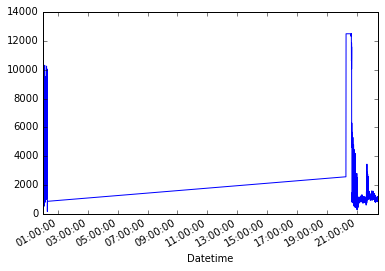

In [10]:
Just_one = station_byid.get_group('Y') # Saves all of the H logs in a df
# pd.rolling_mean(Just_one['Threshold'], 120).plot()
Just_one['Triggers'].plot()

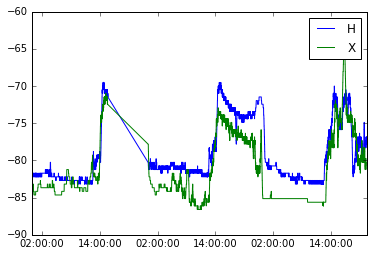

In [6]:
for key, grp in station_byid:
#    plt.plot(pd.rolling_mean(grp['Triggers'][dt.datetime(2016,3,3,12):],60), label=key)
    plt.plot(grp['Threshold'], label=key)

plt.legend()